# Problem Statement

Book-My-Show will enable the ads on their website, but they are also very cautious about their user privacy and information who visit their website. Some ads URL could contain a malicious link that can trick any recipient and lead to a malware installation, freezing the system as part of a ransomware attack or revealing sensitive information. Book-My-Show now wants to analyze that whether the particular URL is prone to phishing (malicious) or not.

In [1]:
#Import the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,roc_curve,auc, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# Data Retrieval

In [2]:
# Read the csv file using pandas 
df = pd.read_csv("dataset.csv")

In [3]:
# Display first 5 records
df.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


# Data Exploration

## Number of samples

In [4]:
#Determine the number of samples present in the data
df.shape

(11055, 32)

The dataframe has 11055 rows and 32 columns. "Result" column is the y variable(Dependent variable). Since it has labelled data, we are dealing with a supervised learning problem.

In [5]:
# List all the columns in the dataframe
df.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

## Check for null values

In [6]:
#Check if there is any null value in any features. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

There are no null values in any of the columns. All the columns are of type integer.

## Get the unique values

In [7]:
# determine the unique elements in all the features. 
pd.Series({col: df[col].unique() for col in df})

index                          [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
having_IPhaving_IP_Address                                               [-1, 1]
URLURL_Length                                                         [1, 0, -1]
Shortining_Service                                                       [1, -1]
having_At_Symbol                                                         [1, -1]
double_slash_redirecting                                                 [-1, 1]
Prefix_Suffix                                                            [-1, 1]
having_Sub_Domain                                                     [-1, 0, 1]
SSLfinal_State                                                        [-1, 1, 0]
Domain_registeration_length                                              [-1, 1]
Favicon                                                                  [1, -1]
port                                                                     [1, -1]
HTTPS_token                 

All the columns have only 2 or all of the values : -1, 0 and 1.  

-1: Phishing
 0: Suspicious
 1: Legitimate

The "Result" column has 2 possible outcomes -1 and 1 where -1 is Phishing and 1 is Legitimate. 

The "Result" is the dependent variable which we must predict. This is the "y" variable. Since the "Result" has 2 classes, this is a Binary classification problem.

## Heat map

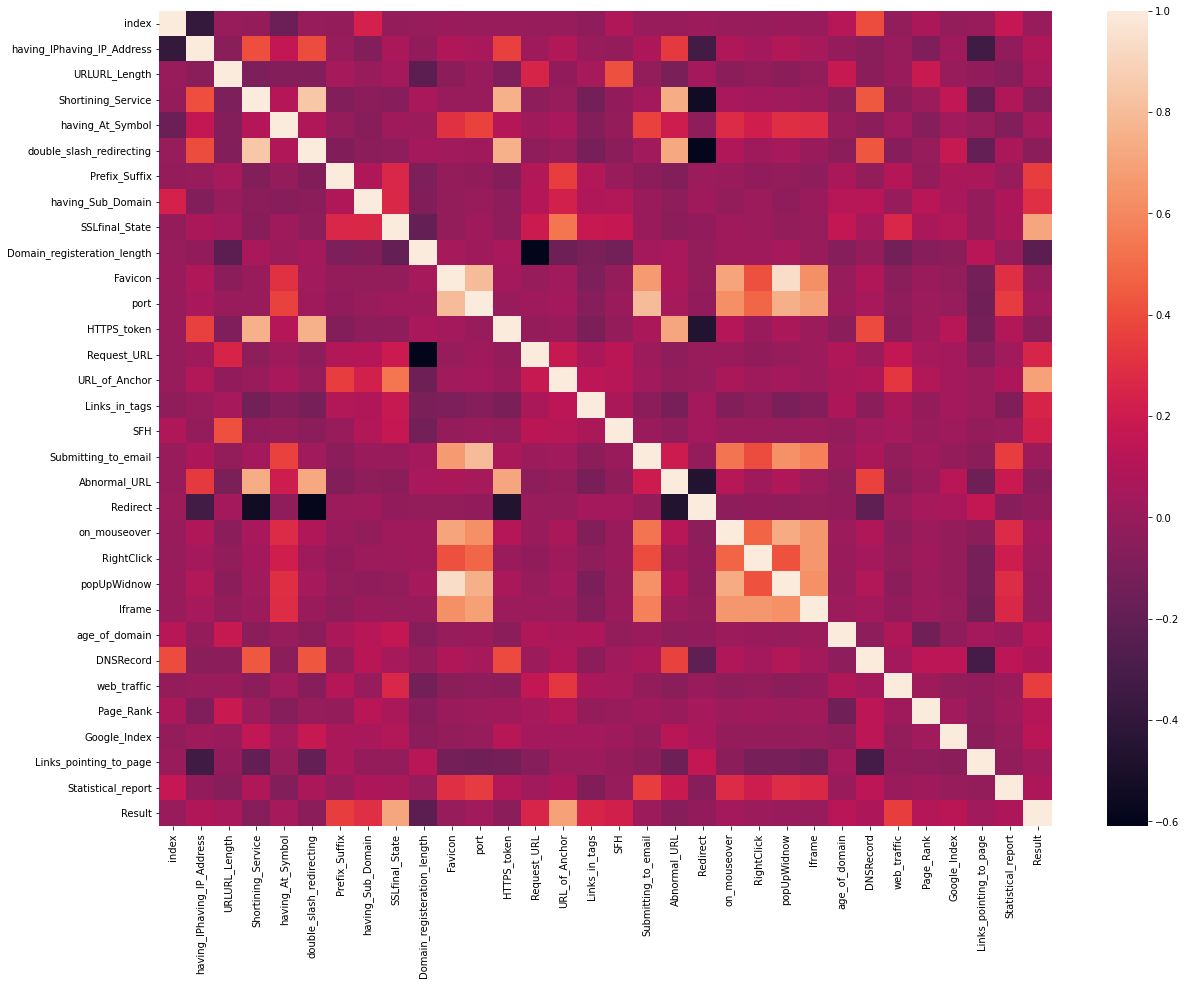

In [8]:
# Find the correlation between the features and plot the heat map.
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())


From the heatmap, its evident that "popUpWindow" and "Favicon" are having strong correlations, since the color is almost white(closer to 1.0). This suggests data redundancy. One of these columns must be removed.

In [9]:
# Drop the Index and Result columns from original dataframe
# Index is irrelevant, so we can drop it.
# We can drop the Result also for now, since we are going to check if the independent variables are highly correlated among themselves.
new_df = df.drop(["index","Result"],axis=1)

In [10]:
# find if there are any correlated features present in the data.
cor_matrix =  new_df.corr().abs()
cor_matrix

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
having_IPhaving_IP_Address,1.000000,0.052411,0.403461,0.158699,0.397389,0.005257,0.080745,0.071414,0.022739,0.087025,...,0.042881,0.096882,0.054694,0.010446,0.050733,0.002922,0.091774,0.029153,0.339065,0.019103
URLURL_Length,0.052411,1.000000,0.097881,0.075108,0.081247,0.055247,0.003997,0.048754,0.221892,0.042497,...,0.013613,0.049381,0.013838,0.179426,0.040823,0.008993,0.183518,0.002902,0.022987,0.067153
Shortining_Service,0.403461,0.097881,1.000000,0.104447,0.842796,0.080471,0.041916,0.061426,0.060923,0.006101,...,0.038118,0.036616,0.016581,0.052596,0.436064,0.047074,0.014591,0.155844,0.198410,0.085461
having_At_Symbol,0.158699,0.075108,0.104447,1.000000,0.086960,0.011726,0.058976,0.031220,0.015522,0.304899,...,0.219503,0.290893,0.284410,0.005499,0.047872,0.032918,0.064735,0.037061,0.006080,0.080357
double_slash_redirecting,0.397389,0.081247,0.842796,0.086960,1.000000,0.085590,0.043079,0.036200,0.047464,0.035100,...,0.025863,0.054463,0.010459,0.050107,0.431409,0.062369,0.003132,0.178415,0.194165,0.070390
Prefix_Suffix,0.005257,0.055247,0.080471,0.011726,0.085590,1.000000,0.087891,0.261391,0.096799,0.007504,...,0.024868,0.014733,0.036904,0.074116,0.016556,0.110598,0.006834,0.067781,0.067423,0.002763
having_Sub_Domain,0.080745,0.003997,0.041916,0.058976,0.043079,0.087891,1.000000,0.267649,0.082839,0.016704,...,0.018230,0.025312,0.010637,0.119254,0.125493,0.005764,0.120730,0.057673,0.010526,0.081627
SSLfinal_State,0.071414,0.048754,0.061426,0.031220,0.036200,0.261391,0.267649,1.000000,0.193622,0.014757,...,0.015854,0.013005,0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,0.011710,0.063411
Domain_registeration_length,0.022739,0.221892,0.060923,0.015522,0.047464,0.096799,0.082839,0.193622,1.000000,0.054253,...,0.023520,0.051410,0.004393,0.062851,0.010477,0.134454,0.059898,0.039766,0.122672,0.002212
Favicon,0.087025,0.042497,0.006101,0.304899,0.035100,0.007504,0.016704,0.014757,0.054253,1.000000,...,0.414382,0.939633,0.627607,0.002628,0.088211,0.050922,0.011699,0.016668,0.127243,0.300917


The correlation matrix will be mirror image about the diagonal and all the diagonal elements will be 1. So, we select any of the upper triangular or lower triangular part of the correlation matrix. Also, we are excluding the diagonal. 

In [11]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
upper_tri

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
having_IPhaving_IP_Address,NaN,0.052411,0.403461,0.158699,0.397389,0.005257,0.080745,0.071414,0.022739,0.087025,...,0.042881,0.096882,0.054694,0.010446,0.050733,0.002922,0.091774,0.029153,0.339065,0.019103
URLURL_Length,NaN,NaN,0.097881,0.075108,0.081247,0.055247,0.003997,0.048754,0.221892,0.042497,...,0.013613,0.049381,0.013838,0.179426,0.040823,0.008993,0.183518,0.002902,0.022987,0.067153
Shortining_Service,NaN,NaN,NaN,0.104447,0.842796,0.080471,0.041916,0.061426,0.060923,0.006101,...,0.038118,0.036616,0.016581,0.052596,0.436064,0.047074,0.014591,0.155844,0.198410,0.085461
having_At_Symbol,NaN,NaN,NaN,NaN,0.086960,0.011726,0.058976,0.031220,0.015522,0.304899,...,0.219503,0.290893,0.284410,0.005499,0.047872,0.032918,0.064735,0.037061,0.006080,0.080357
double_slash_redirecting,NaN,NaN,NaN,NaN,NaN,0.085590,0.043079,0.036200,0.047464,0.035100,...,0.025863,0.054463,0.010459,0.050107,0.431409,0.062369,0.003132,0.178415,0.194165,0.070390
Prefix_Suffix,NaN,NaN,NaN,NaN,NaN,NaN,0.087891,0.261391,0.096799,0.007504,...,0.024868,0.014733,0.036904,0.074116,0.016556,0.110598,0.006834,0.067781,0.067423,0.002763
having_Sub_Domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.267649,0.082839,0.016704,...,0.018230,0.025312,0.010637,0.119254,0.125493,0.005764,0.120730,0.057673,0.010526,0.081627
SSLfinal_State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.193622,0.014757,...,0.015854,0.013005,0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,0.011710,0.063411
Domain_registeration_length,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.054253,...,0.023520,0.051410,0.004393,0.062851,0.010477,0.134454,0.059898,0.039766,0.122672,0.002212
Favicon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.414382,0.939633,0.627607,0.002628,0.088211,0.050922,0.011699,0.016668,0.127243,0.300917


We need to find the independent variables which are highly correlated among themselves. This means there is redundant data. We need to drop these redundant columns. Lets set the threshold as 0.75 and select the columns that are having correlation greater than 0.75. These columns must be dropped from the dataframe.

## Remove highly correlated features

In [12]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
to_drop

['double_slash_redirecting',
 'port',
 'HTTPS_token',
 'Submitting_to_email',
 'popUpWidnow']

The above code returned five columns which are highly correlated among themselves. We will be dropping these columns from the dataframe.

In [13]:
new_df.drop(to_drop,axis=1,inplace=True)

In [14]:
new_df

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,Request_URL,...,on_mouseover,RightClick,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,-1,0,1,-1,1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,-1,-1,-1,-1,1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,-1,-1,-1,1,1,-1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,-1,1,1,-1,1,1,...,-1,1,1,-1,-1,0,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,-1,-1,1,...,-1,-1,-1,1,1,-1,-1,1,1,1
11051,-1,1,1,-1,-1,1,-1,-1,-1,1,...,-1,1,1,1,1,1,1,1,-1,1
11052,1,-1,1,1,-1,1,-1,-1,1,1,...,1,1,1,1,1,1,-1,1,0,1
11053,-1,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,1,1,1,1,1,-1,1,1,1


The redundant columns have been dropped now.

## Remove weak correlated features to target

In [15]:
corr_values = df.corr()['Result'].abs().sort_values(ascending=False)
corr_values

Result                         1.000000
SSLfinal_State                 0.714741
URL_of_Anchor                  0.692935
Prefix_Suffix                  0.348606
web_traffic                    0.346103
having_Sub_Domain              0.298323
Request_URL                    0.253372
Links_in_tags                  0.248229
Domain_registeration_length    0.225789
SFH                            0.221419
Google_Index                   0.128950
age_of_domain                  0.121496
Page_Rank                      0.104645
having_IPhaving_IP_Address     0.094160
Statistical_report             0.079857
DNSRecord                      0.075718
Shortining_Service             0.067966
Abnormal_URL                   0.060488
URLURL_Length                  0.057430
having_At_Symbol               0.052948
on_mouseover                   0.041838
HTTPS_token                    0.039854
double_slash_redirecting       0.038608
port                           0.036419
Links_pointing_to_page         0.032574


"Result" is having strong correlation with "SSLfinal_State" and URL_of_Anchor. 'Redirect', 'RightClick', 'Iframe', 'Favicon' are having a weak correlation with "Result".

In [16]:
new_df.drop(['Redirect', 'RightClick', 'Iframe', 'Favicon'],axis=1,inplace=True)

We dropped the columns which have correlation less than or equal to 0.03. These columns have very little significance to the Result column. 

In [17]:
new_df.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Request_URL,URL_of_Anchor,...,SFH,Abnormal_URL,on_mouseover,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,1,-1,...,-1,-1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,-1,0,1,-1,1,0,...,-1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,-1,-1,-1,-1,1,0,...,-1,-1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,-1,-1,-1,1,-1,0,...,-1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,-1,1,1,-1,1,0,...,-1,1,-1,-1,-1,0,-1,1,1,1


After dropping the columns with correlation <= 0.03, we are left with 21 columns.

## Check for class imbalance

In [18]:
# Get the value counts for Result column
df['Result'].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

In [19]:
df['Result'].value_counts(normalize=True)

 1    0.556943
-1    0.443057
Name: Result, dtype: float64

We can see that around 55 % of values belong to class 1 and 44 percentage of values belong to class -1. We dont have the imbalanced class problem here. 

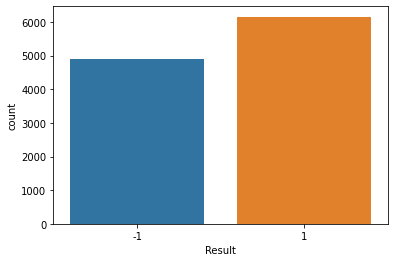

In [20]:
sns.countplot(x='Result',data=df)

## Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e8f0f1f50>,
      dtype=object)

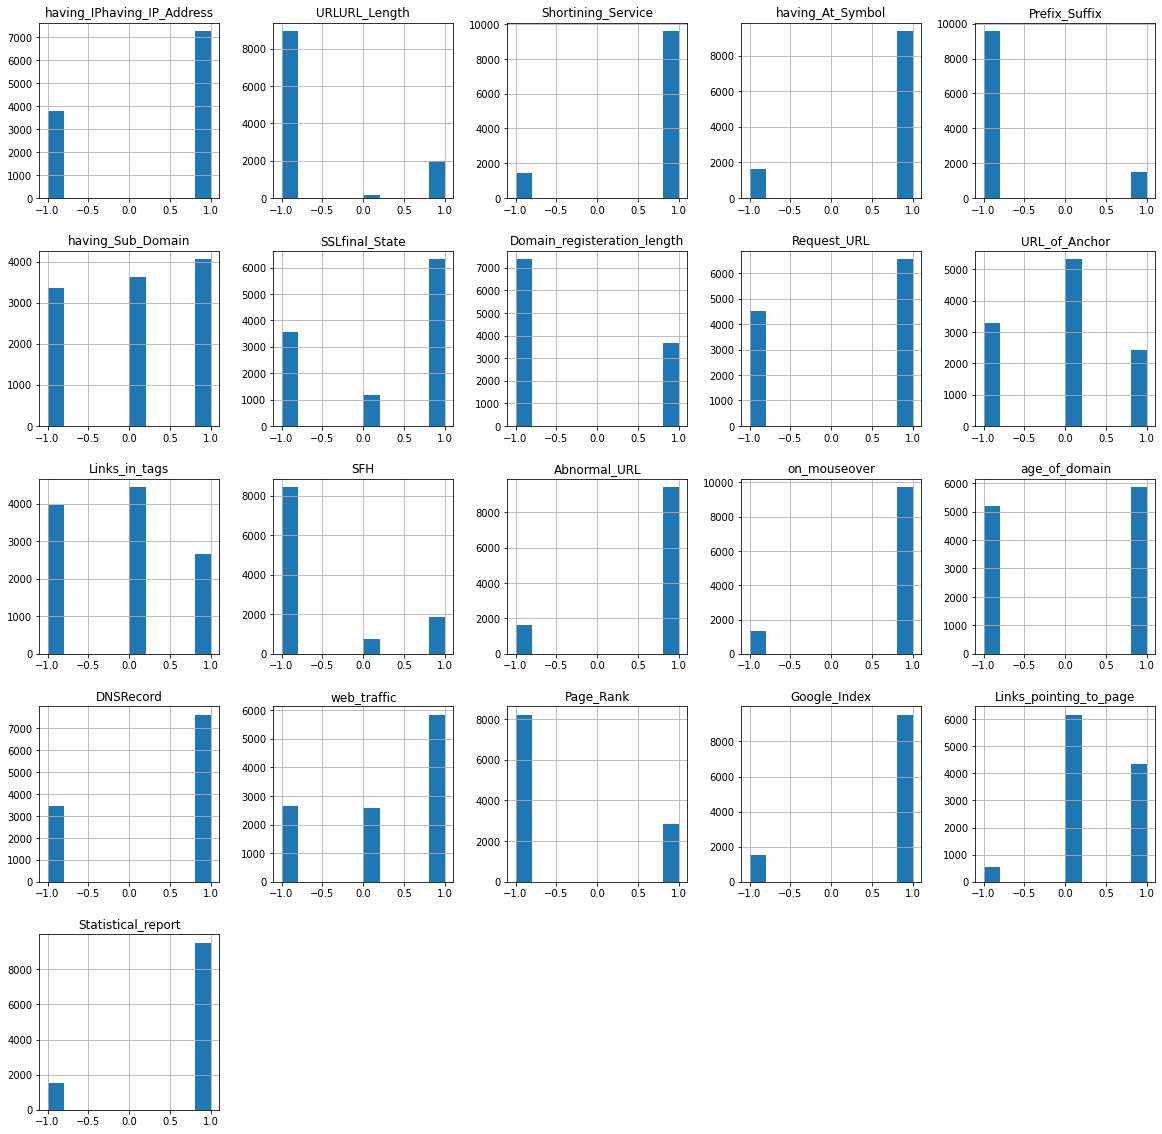

In [21]:
new_df.hist(figsize=(20,20))

Above histograms shows the data distribution of all the columns in the dataset. We can clearly see that the unique values are -1,0 and 1.

## Count Plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

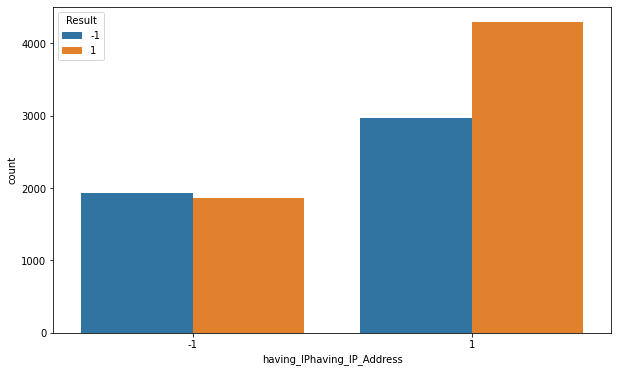

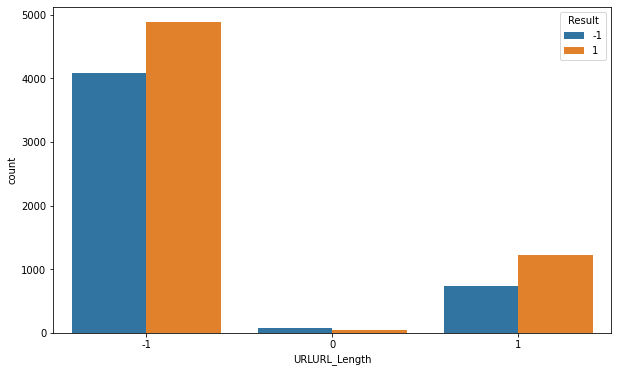

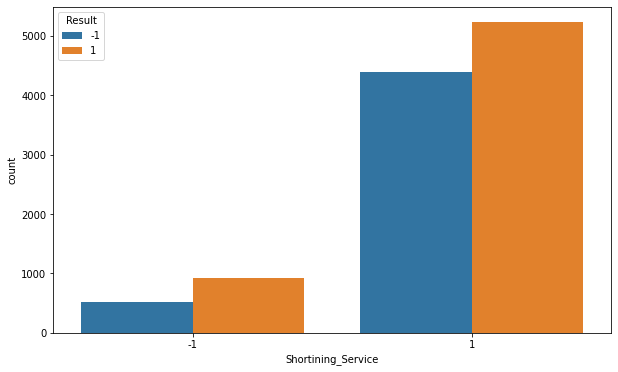

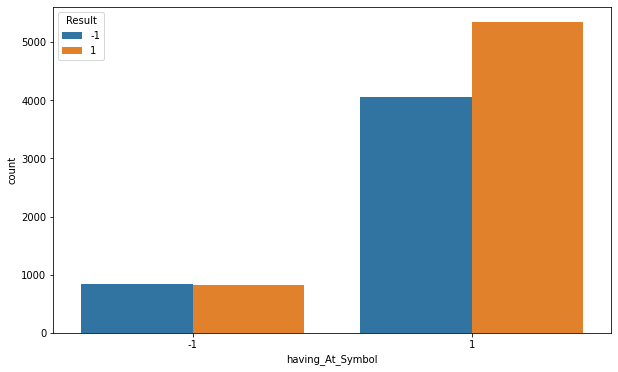

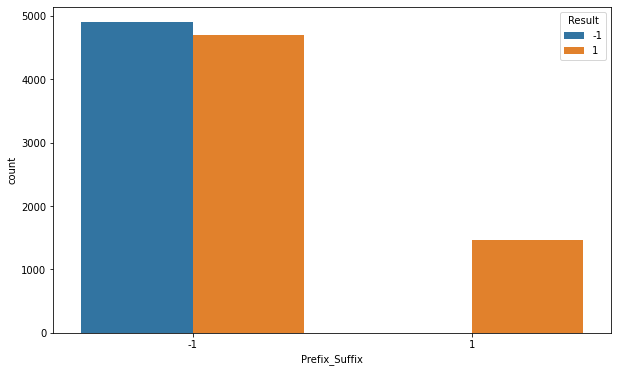

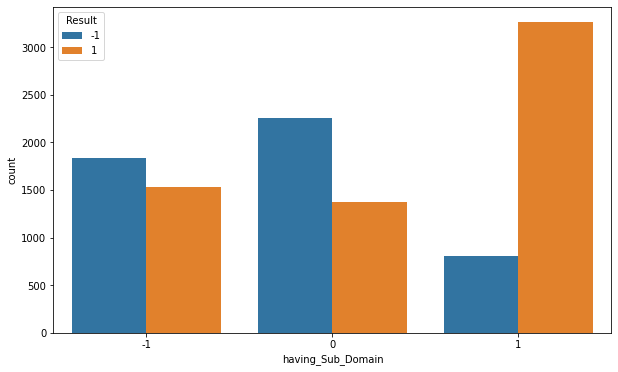

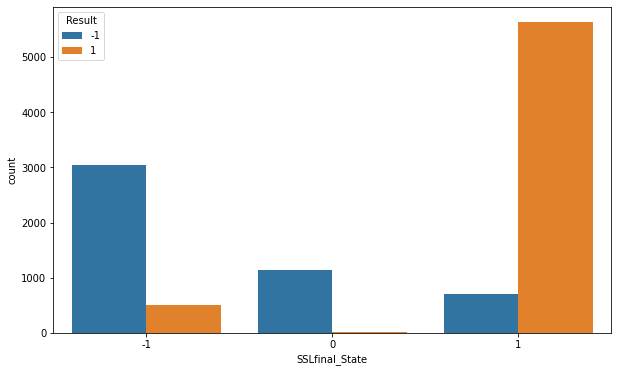

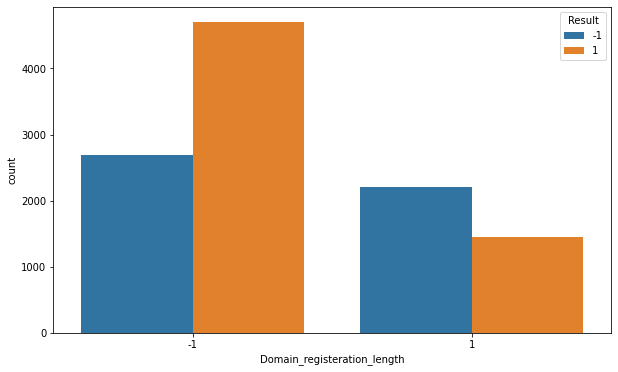

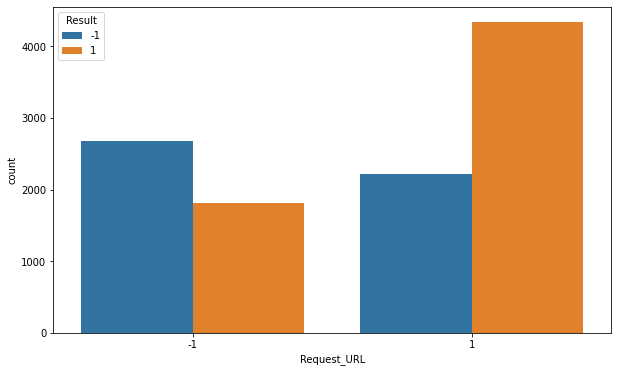

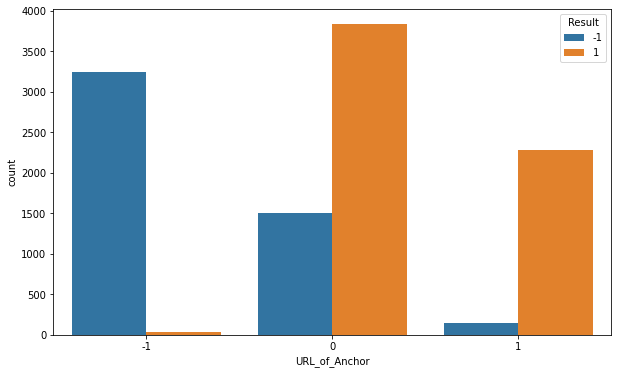

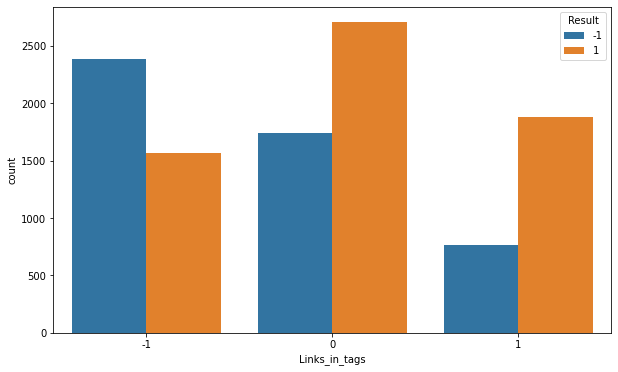

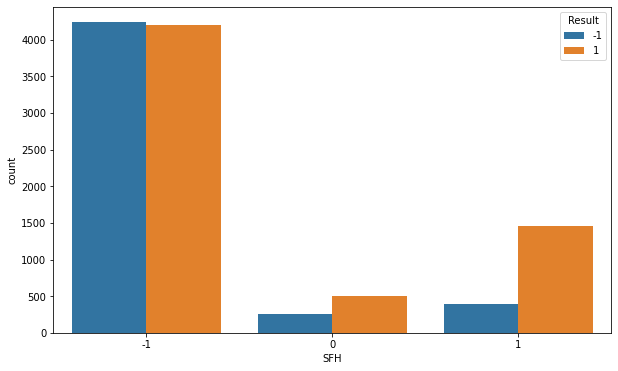

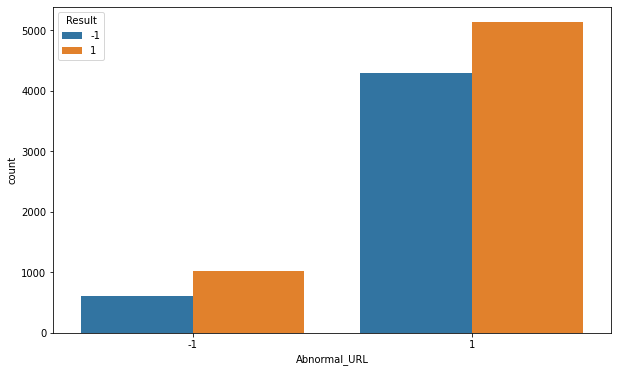

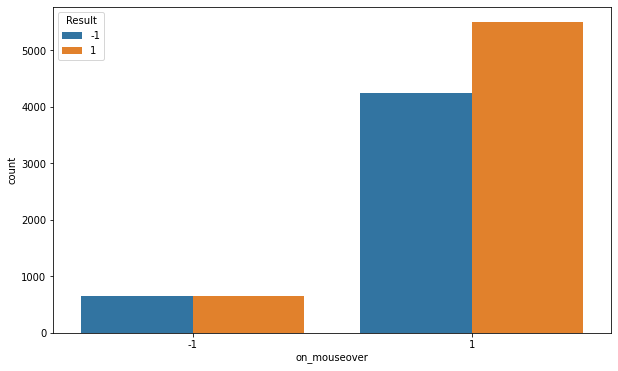

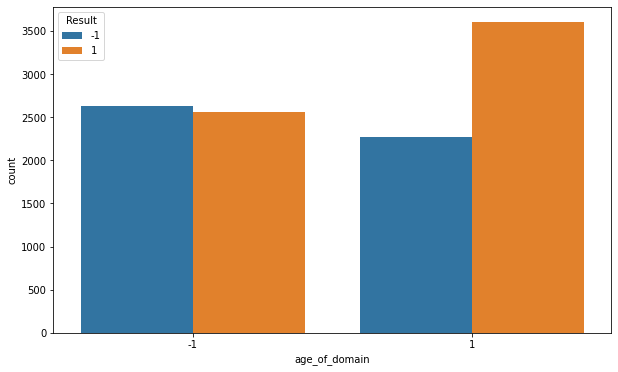

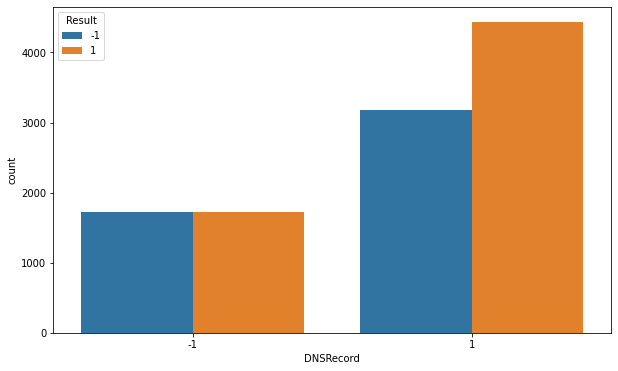

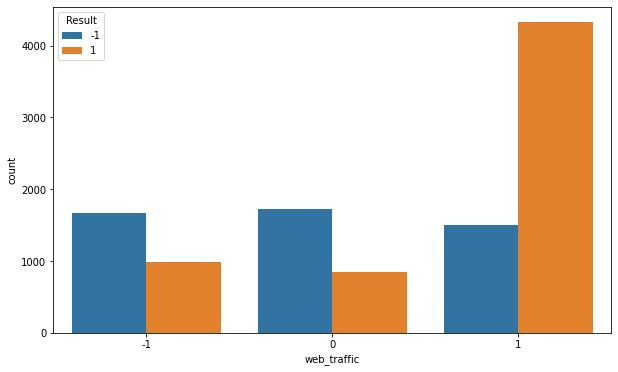

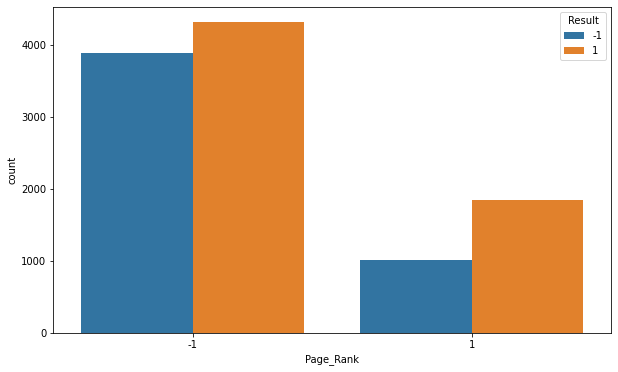

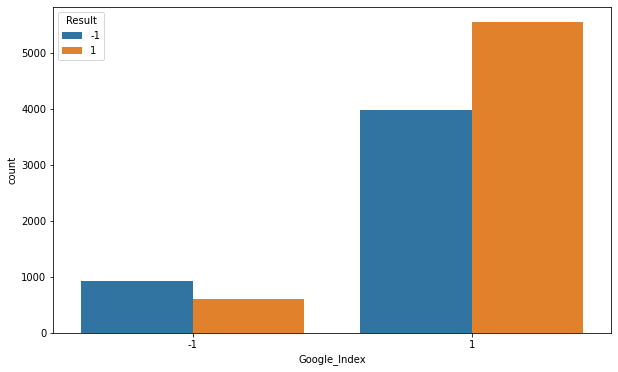

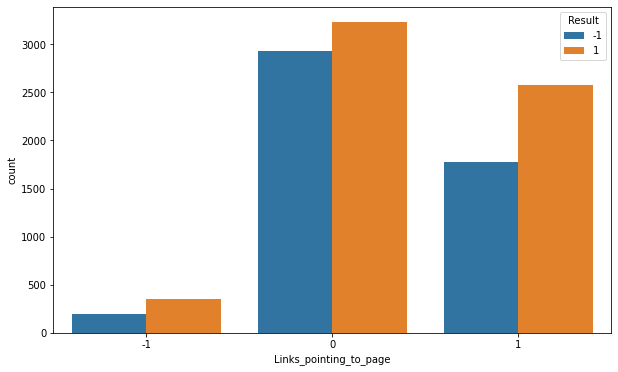

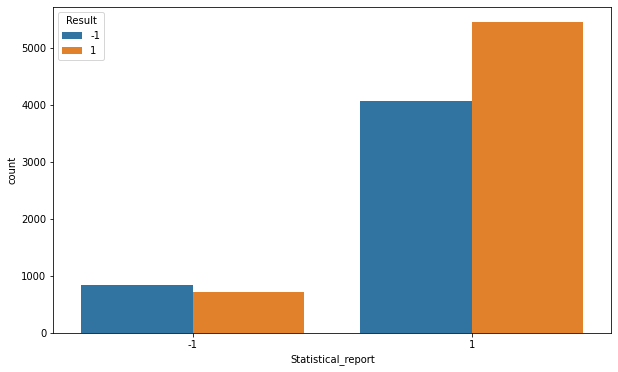

In [22]:
for i in new_df.columns:
    
    plt.figure(figsize=(10,6))
    sns.countplot(new_df[i],hue=df["Result"])

## Insights from EDA

1. From the above graphs, we can clearly see that when SSLFinal_State is Legitimate, the "Result" is mostly "Legitimate". When the SSLFinal_State is "Phishing", the "Result" is also mostly "Phishing". This means we can see a strong positive correlation between SSLFinalState and Result columns.
2. Also, when the URL_of_Anchor is "Legitimate", the "Result" is most of the time "Legitimate". When the URL_of_Anchor is "Phishing", the "Result" is also "Phishing" most of the time. Hence there is a positive correlation between URL_of_Anchor and Result.
3. The web_traffic and Result seem to be having a positive correlation.When the web_traffic is "Legitimate", the "Result" is mostly "Legitimate".

In [23]:
# Define the X and y 
y = df['Result'].values
X = new_df
print(X.shape)
print(y.shape)

(11055, 21)
(11055,)


In [24]:
print(y[:50])

[-1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1  1  1 -1 -1 -1  1  1 -1
 -1  1]


In [25]:
# Split the data into training and testing data - 70% train and 30% test
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7738, 21)
(3317, 21)
(7738,)
(3317,)


In [27]:
unique,counts = np.unique(y_train,return_counts=True)
print(counts)

[3399 4339]


In [28]:
print(unique)
print(counts[0] / (counts[0] + counts[1]))
print(counts[1] / (counts[0] + counts[1]))

[-1  1]
0.4392607909020419
0.5607392090979582


After splitting the data into train and test, we check the y_train and find that there is no class imbalance issue here. There are 43% records that are 'Phishing' and 56% records that are 'Legitimate'.

# Model Building

## Model 1: SGD Classifier

In [29]:
sgdClf = SGDClassifier(random_state=100)
sgdClf.fit(X_train, y_train)

SGDClassifier(random_state=100)

### Performance metrics for Train Data

Lets use K Fold cross validation to evaluate the model.
Here we divide the train data into 5 folds and reserve 1 for validation and 4 for training. We continue the steps till all the folds participate in both  training and validation. By this way, we can validate the model more accurately and keep the test data untouched till the model is ready and finished training.  Also, cross validation resolves the problem of over-fitting.

#### Accuracy

In [30]:
cross_val_score(sgdClf, X_train, y_train, cv=5, scoring="accuracy")

array([0.91860465, 0.9244186 , 0.92312661, 0.91273432, 0.91984486])

We get around 91 % accuracy in all the 5 folds. But for a classification problem, accuracy is not a good measure. There are other measures like Confusion Matrix, Precision, Recall and F1 score.

#### Confusion Matrix


In [31]:
y_train_pred = cross_val_predict(sgdClf, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)


array([[3054,  345],
       [ 276, 4063]])

There are 345 + 276 = 621 wrong predictions. There are 3054 + 4063 = 7117 right predictions.  Accuracy is  7117/(7117 + 621) = 92%

#### Precision, Recall and F1 score

In [32]:
print("precision",precision_score(y_train, y_train_pred))
print("recall",recall_score(y_train, y_train_pred))
print("F1 score", f1_score(y_train,y_train_pred))
print("\n" + classification_report(y_train,y_train_pred))

precision 0.9217332123411979
recall 0.9363908734731505
F1 score 0.9290042300217218

              precision    recall  f1-score   support

          -1       0.92      0.90      0.91      3399
           1       0.92      0.94      0.93      4339

    accuracy                           0.92      7738
   macro avg       0.92      0.92      0.92      7738
weighted avg       0.92      0.92      0.92      7738



#### ROC Curve

 The ROC curve is a plot of True Positive Rate (TPR) versus the False Positive Rate (FPR)

In [33]:
y_scores = cross_val_predict(sgdClf, X_train, y_train, cv=5, method="decision_function")
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

In [34]:
def plot_roc_curve(fpr, tpr, label=None):
 plt.plot(fpr, tpr, linewidth=2, label=label)
 plt.plot([0, 1], [0, 1], 'k--')
 plt.axis([0, 1, 0, 1])
 plt.xlabel('False Positive Rate')
 plt.ylabel('True Positive Rate')

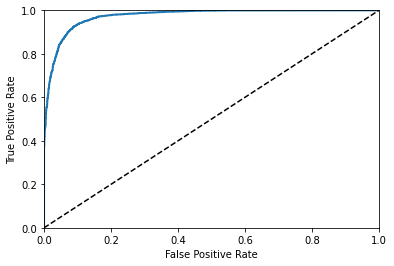

In [35]:

plot_roc_curve(fpr, tpr)
plt.show()


The dotted line shows a very ineffective classifier, similar to random chance. Our SGD Classifier looks effective as its closer to the top left margin.

#### AUC

The ROC curve can be used to generate the AUC. AUC is the total area under the ROC curve. 

In [36]:
roc_auc_score(y_train, y_scores)


0.9734451404135036

The AUC is 0.97 which is closer to 1. This means this is a effective classifier. 

### Performance metrics for Test Data

In [37]:
prediction = sgdClf.predict(X_test)
print("\n" + classification_report(y_test,prediction))


              precision    recall  f1-score   support

          -1       0.94      0.90      0.92      1499
           1       0.92      0.95      0.93      1818

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



In [38]:
# ROC_AUC score for test data
roc_auc_score(y_test,prediction)

0.9253312255841994

 ## Model 2: Logistic Regression

### Performance metrics for Train Data

#### Accuracy

In [39]:
logreg = LogisticRegression()
logreg = logreg.fit(X_train,y_train)

cross_val_score(logreg, X_train, y_train, cv=5, scoring="accuracy")

array([0.92894057, 0.92958656, 0.92571059, 0.92501616, 0.92307692])

#### Confusion Matrix

In [40]:
y_train_pred_lr = cross_val_predict(logreg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred_lr)

array([[3059,  340],
       [ 229, 4110]])

#### Precision, Recall and F1 Score

In [41]:
print("precision",precision_score(y_train, y_train_pred_lr))
print("recall",recall_score(y_train, y_train_pred_lr))
print("F1 score", f1_score(y_train,y_train_pred_lr))
print("\n" + classification_report(y_train,y_train_pred_lr))

precision 0.9235955056179775
recall 0.9472228624106938
F1 score 0.9352599840709979

              precision    recall  f1-score   support

          -1       0.93      0.90      0.91      3399
           1       0.92      0.95      0.94      4339

    accuracy                           0.93      7738
   macro avg       0.93      0.92      0.93      7738
weighted avg       0.93      0.93      0.93      7738



#### ROC Curve

In [42]:
y_scores_lr = cross_val_predict(logreg, X_train, y_train, cv=5, method="decision_function")
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_train, y_scores_lr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


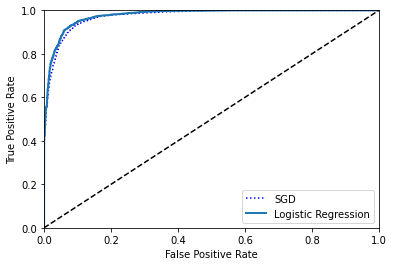

In [43]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_lr, tpr_lr, "Logistic Regression")
plt.legend(loc="bottom right")
plt.show()

#### AUC

In [44]:
roc_auc_score(y_train, y_scores_lr)

0.9775740339827184

### Performance metrics for test data

In [45]:
prediction_lr = logreg.predict(X_test)
print("\n" + classification_report(y_test,prediction_lr))


              precision    recall  f1-score   support

          -1       0.92      0.90      0.91      1499
           1       0.92      0.94      0.93      1818

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



In [46]:
# ROC_AUC score for test data
roc_auc_score(y_test,prediction_lr)

0.9202812876351011

Logistic Regression and SGD classifier are almost equal in terms of model efficiency,  their accuracy approximately 92%.

## Model 3: Random Forest Classifier

### Performance metrics for Train Data

#### GridSearch CV

The Random Forest Classifier has various hyperparameters like n-estimators, max_features etc. We use GridSearch CV to tune the hyperparameters to get a better accuracy or f1 score.

In [47]:
param_grid = [
 {'n_estimators': [100,200,500], 'max_features': ['auto', 'sqrt', 'log2']},
 ]
forest_gs = RandomForestClassifier(random_state=42,n_jobs=-1)
grid_search = GridSearchCV(forest_gs, param_grid, cv=5,
 scoring='f1',
return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid=[{'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 200, 500]}],
             return_train_score=True, scoring='f1')

In [48]:
grid_search.best_params_

{'max_features': 'auto', 'n_estimators': 500}

Now we know the best params and best estimator to use. 

#### Accuracy

In [49]:
rf = grid_search.best_estimator_
y_pred_forest = cross_val_predict(rf, X_train, y_train, cv=5)
y_probas_forest = cross_val_predict(rf, X_train, y_train, cv=5, method="predict_proba")
print(accuracy_score(y_train,y_pred_forest))


0.9666580511760144


#### Confusion Matrix

In [50]:
y_train_pred_lr = cross_val_predict(rf, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred_lr)

array([[3237,  162],
       [  96, 4243]])

In [51]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)

#### ROC Curve

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


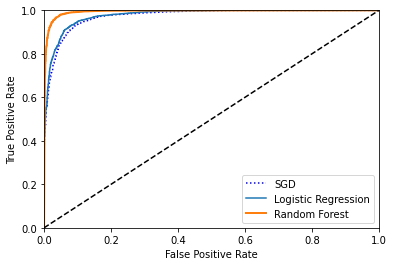

In [52]:
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_lr,tpr_lr, label="Logistic Regression")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="bottom right")
plt.show()

#### Precision Recall and F1 Score

In [53]:
y_pred_forest = cross_val_predict(rf, X_train, y_train, cv=5)
print("precision",precision_score(y_train, y_pred_forest))
print("recall",recall_score(y_train, y_pred_forest))
print("F1 score", f1_score(y_train,y_pred_forest))
print("\n" + classification_report(y_train,y_pred_forest))

precision 0.9632236095346197
recall 0.9778750864254436
F1 score 0.9704940530649587

              precision    recall  f1-score   support

          -1       0.97      0.95      0.96      3399
           1       0.96      0.98      0.97      4339

    accuracy                           0.97      7738
   macro avg       0.97      0.97      0.97      7738
weighted avg       0.97      0.97      0.97      7738



#### AUC

In [54]:
# ROC_AUC score for train data
roc_auc_score(y_train, y_scores_forest)

0.9938788037450653

### Performance metrics for test data

In [55]:
prediction_rf = rf.predict(X_test)
print("\n" + classification_report(y_test,prediction_rf))


              precision    recall  f1-score   support

          -1       0.98      0.96      0.97      1499
           1       0.97      0.98      0.97      1818

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



In [56]:
# ROC_AUC score for test data
roc_auc_score(y_test,prediction_rf)

0.9690850005614303

We can clearly see that Random Forest is the winner out of the 3 models with an accuracy of 97% , F1 score of 0.97 and AUC of 0.97. 

### Feature Importance

In [57]:
feature_names = list(new_df.columns)
rf_feature_importances = rf.feature_importances_
rf_feature_names, rf_feature_scores = zip(*sorted(zip(feature_names, 
rf_feature_importances), key=lambda x: x[1]))

Text(0, 0.5, 'Feature')

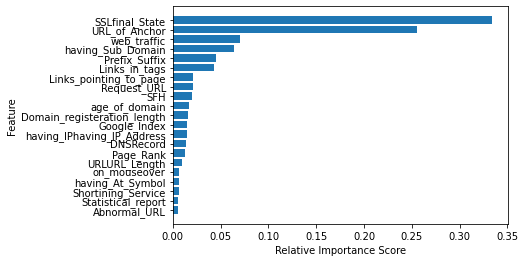

In [58]:
# plot the feature importance plots
y_position = list(range(len(rf_feature_names)))
plt.barh(y_position, rf_feature_scores, align='center', 
 tick_label=rf_feature_names)

plt.xlabel('Relative Importance Score')
plt.ylabel('Feature')


We can see the feature importances for the random forest model. The top three features that contributed toward classifying an URL as "Phishing" or "Legitimate" are SSLFinal_State, URL_of_Anchor and web_traffic.

# Conclusion

In this Project, we analyzed the cyber security dataset classifying an URL as "Phishing" or "Legitimate". We explored various features in the dataset by drawing graphs. We buit classification models like SGD Classifier, Logistic Regression and Random Forest. We did performance metrics for each of these models. We can conclude that the Random Forest model is the winner among the three models with an accuracy of 97%. The F1 score is 97% and the AUC is 0.97. This indicates that we have built an effective model which can classify the URLs correctly with very minimal mis-classification.